2. Person
1. setUp VirusModel ----
Hi 🏝️🏝️🏝️
------------------ Step: 1 ------ ตัวที่ควรเดินทางต่อ 5 ----------------------------
['5']
🤩
สุ่มได้ neighbor ที่ยังไม่ติดเชื้อคือ : 7
ดู check หน่อย 7
ตัวที่เดินมา หรือควรจะติดเชื้อ =  7
['5', '7']
Completed: 1 stepsHi 🏝️🏝️🏝️
------------------ Step: 2 ------ ตัวที่ควรเดินทางต่อ 7 ----------------------------
['5', '7']
🤩
สุ่มได้ neighbor ที่ยังไม่ติดเชื้อคือ : 19
ดู check หน่อย 19
ตัวที่เดินมา หรือควรจะติดเชื้อ =  19
['5', '7', '19']
Completed: 2 stepsHi 🏝️🏝️🏝️
------------------ Step: 3 ------ ตัวที่ควรเดินทางต่อ 19 ----------------------------
['5', '7', '19']
🤩
สุ่มได้ neighbor ที่ยังไม่ติดเชื้อคือ : 6
ดู check หน่อย 6
ตัวที่เดินมา หรือควรจะติดเชื้อ =  6
['5', '7', '19', '6']
Completed: 3 stepsHi 🏝️🏝️🏝️
------------------ Step: 4 ------ ตัวที่ควรเดินทางต่อ 6 ----------------------------
['5', '7', '19', '6']
🤩
สุ่มได้ neighbor ที่ยังไม่ติดเชื้อคือ : 20
ดู check หน่อย 20
ตัวที่เดินมา หรือควรจะติดเชื้อ =  20
['5', '7', '19', '6', '20']
Co

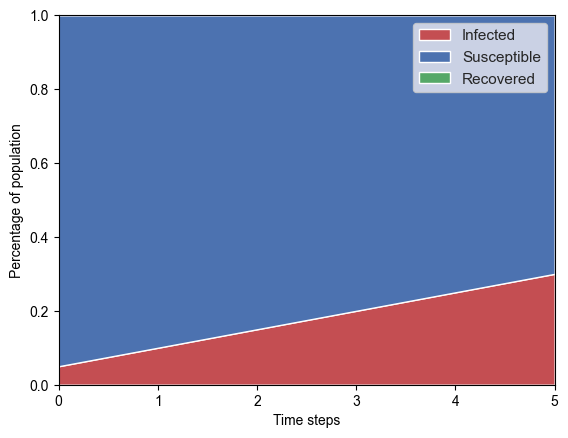

In [8]:
import agentpy as ap
import networkx as nx
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

routing_node = []
start_node = "5"
des_node = "10"
all_node = 20

class Person(ap.Agent):

    print("2. Person")
    def setup(self):
        """ Initialize a new variable at agent creation. """
        self.condition = 0  # Susceptible = 0, Infected = 1, Recovered = 2

    # if len(routing_node) > 1:
    def being_sick(self):
        """ Spread disease to peers in the network. """
        rng = self.model.random
        
        neighbors_list = list(self.network.neighbors(self))
        if neighbors_list:
            print("🤩")
            random_neighbor = None
            # สุ่มเลือก neighbor ที่มี condition เท่ากับ 0 , # ถ้าเกิดเส้นทางที่อยู่ข้างๆตัว self มันถูกติดเชื้อไปแล้ว เราจะไม่ไปเดินหามันอีก
            max_attempts = 20  # กำหนดจำนวนรอบสูงสุดที่จะสุ่ม
            attempts = 0 # ตัวนับจำนวนครั้งที่สุ่ม

            # จะลูปจนกว่าสถานีที่จะเดินต่อไป มันยังไม่เคยไป
            while attempts < max_attempts:
                random_neighbor = random.choice(neighbors_list) # สุ่มเลือกหนึ่งค่าออกจาก neighbors
                attempts += 1  # เพิ่มตัวนับจำนวนครั้งที่สุ่ม
                
                # ตรวจสอบว่า neighbor ที่เลือกมี condition เท่ากับ 0 หรือไม่
                if random_neighbor.condition == 0:
                    break  # ถ้า condition == 0 ให้ออกจากลูป
                    
            if random_neighbor and random_neighbor.condition == 0:
                print(f"สุ่มได้ neighbor ที่ยังไม่ติดเชื้อคือ : {random_neighbor.name}")
                # random_neighbor.condition = 1  
                # routing_node.append(random_neighbor.name)
                return random_neighbor; # เป็นตัวเช้ก ถ้าเกิดไม่สามารถทำให้ใครติดเชื้อได้เลย มันจะสุ่มหาตำแหน่งใหม่
            else:
                print("ไม่พบ neighbor ที่มี condition == 0 หลังจากสุ่ม 5 ครั้ง")
                return 0
        else:
            print("ไม่มี neighbors ให้สุ่ม")
            return 0

        # for n in self.network.neighbors(self):
        #     if n.condition == 0 and self.p.infection_chance > rng.random():
        #         n.condition = 1  # Infect susceptible peer
        #         return str(n.name)
        # if self.p.recovery_chance > rng.random():
        #     self.condition = 2  # Recover from infection



class VirusModel(ap.Model):
    def setup(self):
        """ Initialize the agents and network of the model. """
        print("1. setUp VirusModel ----")
        graph = nx.erdos_renyi_graph( 
            # เปนกราฟสุ่ม
            self.p.population, 
            self.p.network_randomness)

        # Create agents and network
        self.agents = ap.AgentList(self, self.p.population, Person)
        self.network = self.agents.network = ap.Network(self, graph)
        self.network.add_agents(self.agents, self.network.nodes)

        #? set Name
        for i, agent in enumerate(self.agents, start=1):
            agent.name = str(i)

       
        
        # start_node = "5" # กำหนดโหนดเริ่มต้น
        routing_node.append("5");
        self.agents.select(self.agents.name == "5").condition = 1



    def update(self):
        """ Record variables after setup and each step. """

        # Record share of agents with each condition
        for i, c in enumerate(('S', 'I', 'R')):
            # https://www.w3schools.com/python/trypython.asp?filename=demo_ref_enumerate
            # [(0, 'S'), (1, 'I'), (2, 'R')] คือ i จะเปนตัวเลข  ส่วน c เป็น s , i , r
            # i คือเลขลำดับของสถานะ (0 สำหรับ S, 1 สำหรับ I, และ 2 สำหรับ R)
            # c คือสถานะ (S = Susceptible, I = Infected, R = Recovered)
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / self.p.population
            # print(" i , c : ",i ,c)
            # self.I = คนติดเชื้อ (Infected)
            self.record(c)

        

        
        agent_des = self.agents.select(self.agents.name == "10").condition

        if str(agent_des) == '[1]':
            # print("ทำไมติดง่ายจัง ✨")
            self.stop()

        
        if self.I == all_node:
            self.stop()
        # self.stop()


    def step(self):
        """ Define the models' events per simulation step. """
        
        print("Hi 🏝️🏝️🏝️")
        print(f"------------------ Step: {self.t} ------ ตัวที่ควรเดินทางต่อ {routing_node[-1]} ----------------------------")
        print(routing_node)

        # check ด้านล่างจะ return โหนดที่เราสุ่มมา แล้วต้องการจะเดินต่อ
        check = self.agents.select(self.agents.name == str(routing_node[-1])).being_sick()
        print("ดู check หน่อย", check.name[0])
        if isinstance(check, int):
            print("📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌")
            self.stop()
        if isinstance(check, ap.sequences.AttrIter):
            print("ตัวที่เดินมา หรือควรจะติดเชื้อ = " , str(check.name[0]))
            self.agents.select(self.agents.name == str(check.name[0])).condition = 1
            routing_node.append(str(check.name[0]))
        print(routing_node)
        
        


        

    def end(self):
        """ Record evaluation measures at the end of the simulation. """

        # Record final evaluation measures
        # self.report('Total share infected', self.I + self.R)
        # self.report('Peak share infected', max(self.log['I']))



parameters = {
    'population': 20,
    'infection_chance': 0.9, # โอกาสที่ตัวแทนจะติดเชื้อเมื่อสัมผัสกับผู้ติดเชื้อ
    'recovery_chance': 0.1,
    'initial_infection_share': 0.1, # สัดส่วนของประชากรที่เริ่มติดเชื้อ.
    'number_of_neighbors': 2, # จำนวนเพื่อนบ้านในเครือข่ายสำหรับแต่ละตัวแทน.  
    'network_randomness': 0.4
}

model = VirusModel(parameters)
results = model.run()

results

def virus_stackplot(data, ax):
    """ Stackplot of people's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['I', 'S', 'R']]

    sns.set()
    ax.stackplot(x, y, labels=['Infected', 'Susceptible', 'Recovered'],
                 colors = ['r', 'b', 'g'])

    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of population")


fig, ax = plt.subplots()
virus_stackplot(results.variables.VirusModel, ax)


def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("Virus spread")
    ax2.set_title(f"Share infected: {m.I}")

    virus_stackplot(m.output.variables.VirusModel, ax1)

    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.condition]
    print("colors : ",colors)
    # Update colors based on routing_node
    # colors = [color_dict[c] if agent.name not in routing_node else 'r' for agent, c in zip(m.agents, m.agents.condition)]
    
    labels = {node: agent.name for node, agent in zip(m.network.graph.nodes, m.agents)}
    pos = nx.circular_layout(m.network.graph)
    nx.draw(m.network.graph, pos, node_color=colors, node_size=70, ax=ax2, with_labels=False)
    nx.draw_networkx_labels(m.network.graph, pos, labels=labels, ax=ax2, font_size=8, font_color='black')


fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure
parameters['population'] = 20 # Lower population for better visibility
animation = ap.animate(VirusModel(parameters), fig, axs, animation_plot)
IPython.display.HTML(animation.to_jshtml())